# Assignment 2 - Machine Learning Basics

## *Scarlett Hwang*
Netid:  *jh608*

Github link: *Link to the github repo with your completed assignment*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. Flexible statistical learning would be better, because large size of observations will make the overfitting chance decreased.
2. Flexible statistical learning would be worse, small size of obeservations make a higher probability of overfitting.
3. Flexible statistical learning would be better, it has higher degree of freedom.
4. Flexible statistical learning would be worse, when variance of the error terms is too high, flexible methods would fit the noise.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a)
(1) Regression, dpendent variable is contiunous
(2) Inference, we want to know the relationship between salary and independent variables.
(3) n = 500, p = 3


(b)
(1) Classification, output variable is binary.
(2) Prediction, we'd like to know whether it would be success or failure.
(3) n = 20, p = 13

(c)
(1) Regression, the outcome variable is continuous.
(2) Prediction, we want to predict the percentage of change.
(3) n = 52, p =3

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [100]:
# (a)
# This question was too difficult, so I asked for the help of other classmates, coworked, and tried to understand the logic.
import numpy as np
from scipy.spatial.distance import cdist

class Knn:
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        self.x = x
        self.y = y

    from scipy.spatial.distance import cdist
    def predict(self, x, k):
        result = [] 
        for i in range(x.shape[0]):
            tmp = np.array(x.iloc[i,:]).reshape(1,-1)
            dist = cdist(self.x, tmp,'euclidean')
            y_hat.append(self.y.iloc[dist.argsort(axis = 0)[:k].flatten(),0].mode()[0])
        return result
    
    def predict_manul(self, x, k):
        result = [] 
        for i in range(x.shape[0]):
            tmp = np.array(x.iloc[i,:])
            #calculate the distance
            dist = np.tile(tmp, x.shape[0]).reshape([x.shape[0],x.shape[1]])
            dist = (dist - self.x)**2
            dist = (np.sum(dist, axis = 1))**0.5

            result.append(self.y.iloc[dist.argsort(axis = 0)[:k],0].mode()[0])
        return result

def accuracy(y,result):
    nvalues = len(y)
    same = 0
    for i in range(len(result)):
        if result[i] == y[i]:
            same += 1        
    accuracy = same / nvalues
    return accuracy

In [101]:
# (b) load the datasets
import pandas as pd
A2_x_test_low = pd.read_csv('data/A2_X_test_low.csv', header = None)
A2_x_train_low = pd.read_csv('data/A2_X_train_low.csv',header = None)
A2_y_test_low = pd.read_csv('data/A2_y_test_low.csv',header = None)
A2_y_train_low = pd.read_csv('data/A2_y_train_low.csv',header = None)
A2_x_test_high = pd.read_csv('data/A2_X_test_high.csv', header = None)
A2_x_train_high = pd.read_csv('data/A2_X_train_high.csv',header = None)
A2_y_test_high = pd.read_csv('data/A2_y_test_high.csv',header = None)
A2_y_train_high = pd.read_csv('data/A2_y_train_high.csv',header = None)

In [102]:
#(c)
import time
knn_low = Knn()
knn_low.fit(A2_x_train_low,A2_y_train_low)
k = 5
y_low = A2_y_test_low[0].values.ravel()
start_low = time.clock()
y_hat_low_manul = knn_low.predict_manul(x_test_low, k)

time_low = time.clock() - start_low
accuracy_low = accuracy(y_low, y_hat_low_manul)
print('(c)low-dimensional')
print('Time:',time_low)
print('accuracy:',accuracy_low)

(c)low-dimensional
Time: 1.8932370676193386
accuracy: 0.925


In [39]:
#(c)
import time
knn_high = Knn()
knn_high.fit(x_train_high,y_train_high)
k = 5
y_high = y_test_high[0].values.ravel()
start_high = time.clock()
y_hat_high = knn_high.predict_manul(x_test_high, k)
time_high = time.clock() - start_high
accuracy_high = accuracy(y_high, y_hat_high)
print('(c)high-dimensional')
print('Time:',time_high)
print('Accuracy:',accuracy_high)

(c)high-dimensional
Time: 5.252222010894911
Accuracy: 0.993


In [103]:
#(d) 
from sklearn.neighbors import KNeighborsClassifier as KNNClassifier
from sklearn.metrics import accuracy_score
time_sklearn_low_start = time.clock()
neighClassifier = KNNClassifier(n_neighbors=k)
#low dimension
neighClassifier.fit(A2_x_train_low, A2_y_train_low.values.ravel())
y_sk_low = neighClassifier.predict(x_test_low)
time_sklearn_low = time.clock() - time_sklearn_low_start
accuracy_sklearn_low = accuracy_score(y_pred = y_sk_low, y_true = A2_y_test_low.values.ravel())
print('(d)low-dimension')
print('Time:',time_sklearn_low)
print('Accuracy:',accuracy_sklearn_low)

(d)low-dimension
Time: 0.006611285614781082
Accuracy: 0.925


In [42]:
#(d)
time_sklearn_high_start = time.clock()
#high dimension
neighClassifier.fit(A2_x_train_high, A2_y_train_high.values.ravel())
y_sk_high = neighClassifier.predict(A2_x_test_high)
time_sklearn_high = time.clock() - time_sklearn_high_start
accuracy_sklearn_high = accuracy_score(y_pred = y_sk_high, y_true = A2_y_test_high.values.ravel())
print('(d) high dimension')
print('Time:',time_sklearn_high)
print('Accuracy:',accuracy_sklearn_high)

(d) high dimension
Time: 0.28641964519920293
Accuracy: 0.993


(e)
prediction process is slow. It takes more time and difficult to test the code.
Hardware processing takes more cost.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [104]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])


y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [105]:
test = np.array([0, 0, 0])


dist= pd.DataFrame(np.linalg.norm(test - X, axis = 1, keepdims = True), columns = ['Dist'])
dist.index = dist.index +1
dist.index.name = 'obs'
dist

,Dist
obs,
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


In [45]:
#（b）knn with K = 1


knn = KNNClassifier(n_neighbors = 1)
knn.fit(X,y)
predicted_color = knn.predict(test.reshape(1,-1))
print('when k=1, prediction is %s.'% predicted_color[0] )


when k=1, prediction is b.


When K = 3, the prediction is r(red)

In [106]:
#（c）K = 3


knn=KNNClassifier(n_neighbors=3)
knn.fit(X,y)
predicted_color = knn.predict(test.reshape(1,-1))
print('when k=3, predicted color is %s' % predicted_color[0])

when k=3, predicted color is r


When K = 3, the prediction is r(red)

(d) Non-linear model needs flexible methods( if the boundary is nonliner then, the k would be expected to be small.)

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [107]:
#（a） 
from sklearn.datasets import make_moons
X, Y = make_moons(n_samples = 1000, noise = 0.35, random_state = 888)

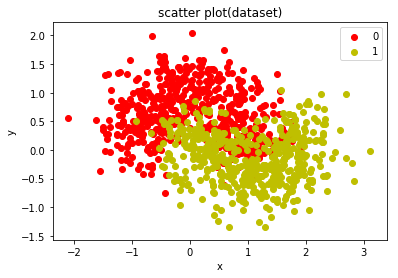

In [108]:
#(b)
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(X[Y== 0][:,0], X[Y== 0][:,1], c = 'r', label = '0')
plt.scatter(X[Y == 1][:,0], X[Y == 1][:,1], c = 'y', label = '1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('scatter plot(dataset)')
plt.legend()
plt.show()

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [111]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline


In [112]:
# (a)
X_train, Y_train = X, Y 
X_test,Y_test = make_moons(n_samples=1000,noise=0.35)



In [113]:
#(b) 
x_errors = range(1,500)
y_errors = []
for i in range(1,500):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,Y_train)
    y_hat = neigh.predict(X_test)
    y_errors.append(mean_squared_error(Y_test,y_hat))

<function matplotlib.pyplot.show(*args, **kw)>

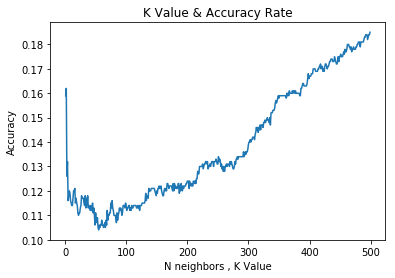

In [114]:
plt.title("K Value & Accuracy Rate")
plt.xlabel("N neighbors , K Value")
plt.ylabel("Accuracy")
plt.plot(x_errors,y_errors) 
plt.show

(c) 
As the k value increases, the accuracy decreases to a certain point(around 100), and than goes up again.


(d) What values of k represent high bias and which represent high variance?
As K is small, high bias(underfitting).
As K is large, high variance(overfitting).

(e)The optimal value of K would be in the range of [10,50] which have the lowest error rate.

(f) In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

For example, In Kmeans model, the number of clusters control the flexibility of the model.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [116]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

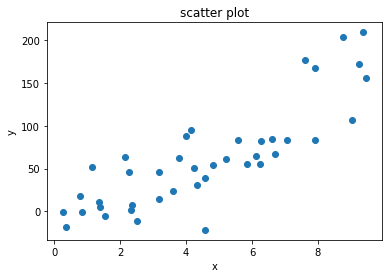

In [117]:
#(a) scatter plot
plt.scatter(x_train,y_train)
plt.title('scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [119]:
#(b) 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


regmodel = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)
print('regression: y = %f + %f * x' % (regmodel.intercept_, regmodel.coef_))
print('R-squared: %f' % regmodel.score(np.array(x_train).reshape(-1,1), y_train))
print('The MSE: %f' % mean_squared_error(regmodel.predict(np.array(x_train).reshape(-1,1)), y_train))


regression: y = -21.730783 + 18.303207 * x
R-squared: 0.701459
The MSE: 1052.585366


In [120]:
#(c)
import math
log_x_train = [math.log(x) for x in x_train]
log_x_test = [math.log(x) for x in x_test]
log_X_train = np.c_[np.array(x_train),np.array(log_x_train)]
log_X_test = np.c_[np.array(x_test),np.array(log_x_test)]
#fit the model
reg_log = LinearRegression().fit(log_X_train,y_train)
print('regression: y = %f + %fx %flog(x)'%(reg_log.intercept_, reg_log.coef_[0], reg_log.coef_[1]))
print('R-squared:', reg_log.score(log_X_train,y = np.array(y_train).reshape(-1,1)))
reg_log_estimate = reg_log.predict(log_X_train)
print('The MSE:', mean_squared_error(y_pred = reg_log_estimate, y_true = np.array(y_train).reshape(-1,1)))

regression: y = -23.680150 + 25.082805x -23.330631log(x)
R-squared: 0.7219455369854199
The MSE: 980.3549541792602


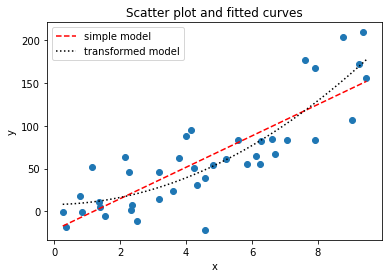

In [74]:
#(d)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg_model = LinearRegression().fit(np.array(x_train).reshape(-1,1), y_train)

plt.scatter(x_train, y_train)
plt.title('Scatter plot and fitted curves')
x_mesh = np.linspace(min(x_train),max(x_train),200)
y_linear = reg_model.intercept_+reg_model.coef_[0]*x_mesh
x_train_trans = np.hstack((np.array(x_train).reshape(-1,1), np.square(x_train).reshape(-1,1)))
x_test_trans = np.hstack((np.array(x_test).reshape(-1,1), np.square(x_test).reshape(-1,1)))
reg_model_trans = LinearRegression().fit(x_train_trans, y_train)
y_quadratic = reg_model_trans.intercept_+reg_model_trans.coef_[0]*x_mesh+reg_model_trans.coef_[1]*x_mesh**2
plt.plot(x_mesh,y_linear,'r--',label='simple model')
plt.plot(x_mesh,y_quadratic,'k:',label='transformed model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [121]:
#(e)
print('Simple : R-squared: %f' % reg_model.score(np.array(x_test).reshape(-1,1), y_test))
print('Simple model MSE: %f' % mean_squared_error(reg_model.predict(np.array(x_test).reshape(-1,1)), y_test))


Simple : R-squared: 0.555647
Simple model MSE: 2023.312109


In [122]:
#(e)
print('Transforemd : R-squared : %f' % reg_model_trans.score(x_test_trans, y_test))
print('Transformed: MSE : %f' % mean_squared_error(reg_model_trans.predict(x_test_trans), y_test))


Transforemd : R-squared : 0.692782
Transformed: MSE : 1398.881758


(f)
Transformed performed better, considering R-squared and MSE.
Data points are better in the transformed model.



(g) If the test data was totally different from the training data, the model's predictive capability will be negative.
